In [1]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict
from typing import Literal

In [2]:
class State(TypedDict):
    seed: int

graph_builder = StateGraph(State)

In [3]:
def node_1(state: State):
    # print("node_1 : " , state)
    return {
    }

def node_2(state: State):
    print("node_2 : " , state)
    return {
    }

def node_3(state: State):
    print("node_3 : " , state)
    return {
    }

def node_4(state: State):
    print("node_4 : " , state)
    return {
    }


In [4]:
graph_builder.add_node("node_1", node_1)
graph_builder.add_node("node_2", node_2)
graph_builder.add_node("node_3", node_3)
graph_builder.add_node("node_4", node_4)

# def decide_path(state: State) -> Literal["node_3", "node_4"]:
#     if state["seed"] % 2 == 0:
#         return "node_3"
#     else:
#         return "node_4"
    
def decide_path(state: State):
    return state["seed"] % 2 == 0

graph_builder.add_edge(START, "node_1")
graph_builder.add_edge("node_1", "node_2")
# graph_builder.add_conditional_edges("node_2", decide_path)
graph_builder.add_conditional_edges(
    "node_2", 
    decide_path, 
    {
        True: "node_3",
        False: "node_4",
        "hello" : END,
    }
)
graph_builder.add_edge("node_3", END)
graph_builder.add_edge("node_4", END)





# graph.invoke({"hello": "world"})




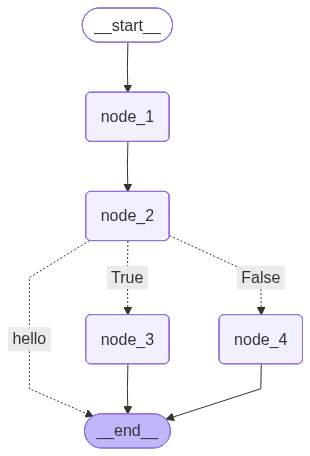

In [5]:


graph = graph_builder.compile()

graph


